# Dow Jones
The Dow Jones Industrial Average is a price-weighted measurement stock market index of 30 prominent companies listed on stock exchanges in the USA.

In [57]:
# Initial Imports 
import os
import pandas as pd
from datetime import datetime, timedelta
import hvplot.pandas 
import numpy as np
from pathlib import Path 
import requests
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import logging

# Dot ENV
from dotenv import load_dotenv

# Jupyter Widgets 
import ipywidgets as widgets
from IPython.display import display

# Alpaca Trade API  
import alpaca_trade_api as tradeapi
import alpaca_trade_api as api
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit, URL

# Sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# News API
import nltk as nltk
#from newsapi.newsapi_client import NewsApiClient
#from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Tensorboard
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorboard.plugins.hparams import api as hp

%matplotlib inline

In [58]:
# Create output directory to store image files via Plotly
if not os.path.exists("images"):
    os.mkdir("images")

In [59]:
# Load .env enviroment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create Alpaca Trade API client
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

## Joe Biden

In [60]:
# JOE BIDEN: Set parameters for API call
symbol = "DIA"
timeframe = "1Day"
start = "2021-01-20"
end = "2022-04-13"

# Retrieve daily bars for SPY in a dataframe and printing the first 5 rows
dow_bars_biden = alpaca.get_bars(symbol, timeframe, start, end).df
print(dow_bars_biden.head())

                             open      high     low   close   volume  \
timestamp                                                              
2021-01-20 05:00:00+00:00  310.40  312.3385  309.94  311.77  2398402   
2021-01-21 05:00:00+00:00  312.01  312.7098  311.20  311.87  1938653   
2021-01-22 05:00:00+00:00  309.86  311.0200  309.09  309.97  2049721   
2021-01-25 05:00:00+00:00  308.99  309.7800  305.62  309.65  4546419   
2021-01-26 05:00:00+00:00  310.57  311.1900  309.21  309.39  2256091   

                           trade_count        vwap  
timestamp                                           
2021-01-20 05:00:00+00:00        21699  311.241031  
2021-01-21 05:00:00+00:00        18283  311.959660  
2021-01-22 05:00:00+00:00        19638  310.202344  
2021-01-25 05:00:00+00:00        43903  308.196736  
2021-01-26 05:00:00+00:00        20214  309.976676  


In [61]:
# TRUMP: Retrieve daily bar data for DIA in a dataframe 
dow_bars_biden = alpaca.get_bars('DIA', 
                                 TimeFrame.Day, 
                                 '2017-01-01', 
                                 '2021-01-20').df
dow_bars_biden.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-01-03 05:00:00+00:00,198.70,199.100,197.480,198.42,6669759,34518,198.138509
2017-01-04 05:00:00+00:00,198.76,199.360,198.600,199.15,4823184,31387,199.075727
2017-01-05 05:00:00+00:00,198.95,199.265,197.895,198.75,4124542,25108,198.723084
2017-01-06 05:00:00+00:00,198.73,199.830,198.170,199.51,4322585,26783,199.321908
2017-01-09 05:00:00+00:00,199.09,199.270,198.750,198.76,2303543,15160,198.934408


<AxesSubplot:title={'center':'"Closing price of the Dow Jones during the presidency of Joe Biden'}, xlabel='timestamp'>

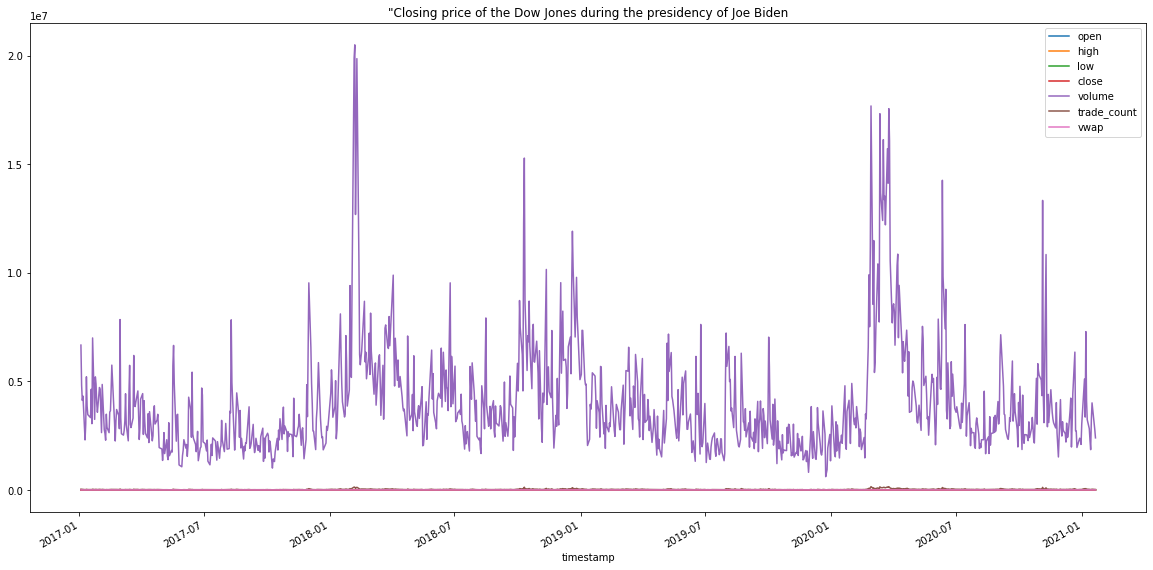

In [62]:
# BIDEN: Plot daily close
dow_bars_biden.plot(figsize=(20,10), title='"Closing price of the Dow Jones during the presidency of Joe Biden')

# JPEG 
#plt.savefig("dow_close_trump.jpg")

In [63]:
# BIDEN: Cumulative/Daily Returns
dow_cumulative_returns_biden = dow_bars_biden.pct_change()
dow_cumulative_returns_biden.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-01-03 05:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 05:00:00+00:00,0.000302,0.001306,0.005671,0.003679,-0.276858,-0.090706,0.004730
2017-01-05 05:00:00+00:00,0.000956,-0.000477,-0.003550,-0.002009,-0.144851,-0.200051,-0.001771
2017-01-06 05:00:00+00:00,-0.001106,0.002835,0.001390,0.003824,0.048016,0.066712,0.003013
2017-01-09 05:00:00+00:00,0.001812,-0.002802,0.002927,-0.003759,-0.467091,-0.433969,-0.001944


In [64]:
# Replace null values with '0'
dow_cumulative_returns_biden = dow_cumulative_returns_biden.fillna(0)
dow_cumulative_returns_biden

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-01-03 05:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04 05:00:00+00:00,0.000302,0.001306,0.005671,0.003679,-0.276858,-0.090706,0.004730
2017-01-05 05:00:00+00:00,0.000956,-0.000477,-0.003550,-0.002009,-0.144851,-0.200051,-0.001771
2017-01-06 05:00:00+00:00,-0.001106,0.002835,0.001390,0.003824,0.048016,0.066712,0.003013
2017-01-09 05:00:00+00:00,0.001812,-0.002802,0.002927,-0.003759,-0.467091,-0.433969,-0.001944
...,...,...,...,...,...,...,...
2021-01-13 05:00:00+00:00,0.001322,0.001124,0.003270,-0.000354,-0.190510,-0.221239,0.001789
2021-01-14 05:00:00+00:00,0.003026,0.002145,-0.000097,-0.001867,0.743065,0.279970,0.000670
2021-01-15 05:00:00+00:00,-0.011426,-0.009442,-0.012456,-0.006225,0.240341,0.371006,-0.009430


In [9]:
# CSV


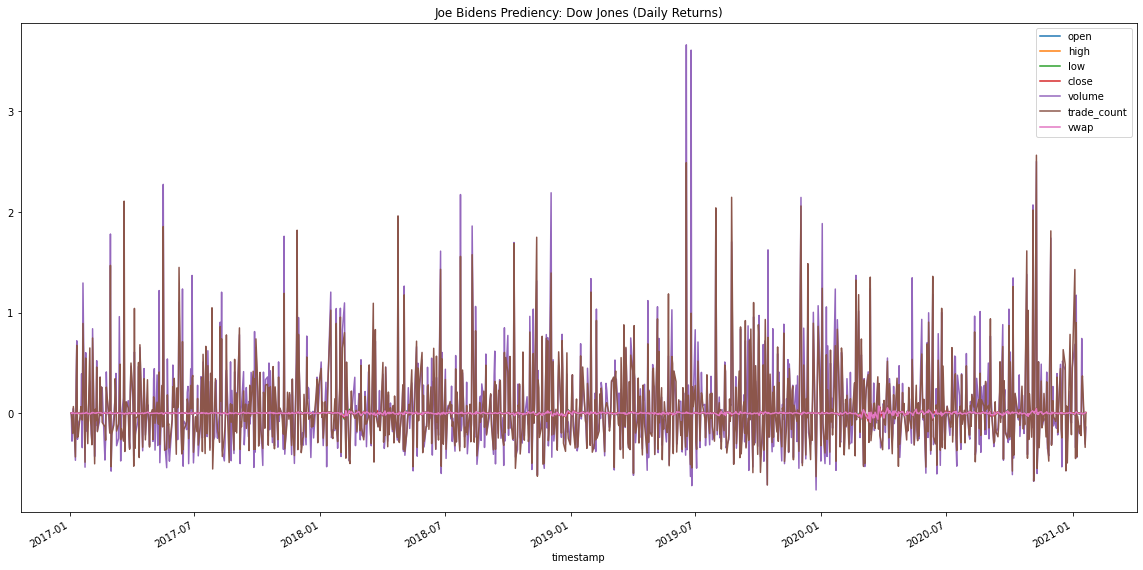

In [65]:
# Plot cumulative returns
dow_cumulative_returns_biden.plot(figsize=(20,10), title='Joe Bidens Prediency: Dow Jones (Daily Returns)')
plt.savefig("dia_close_biden.jpg")

In [66]:
# BIDEN: Standard deviation 
dow_cumulative_returns_biden.std()

open           0.012265
high           0.010453
low            0.011700
close          0.013517
volume         0.492043
trade_count    0.443601
vwap           0.010541
dtype: float64

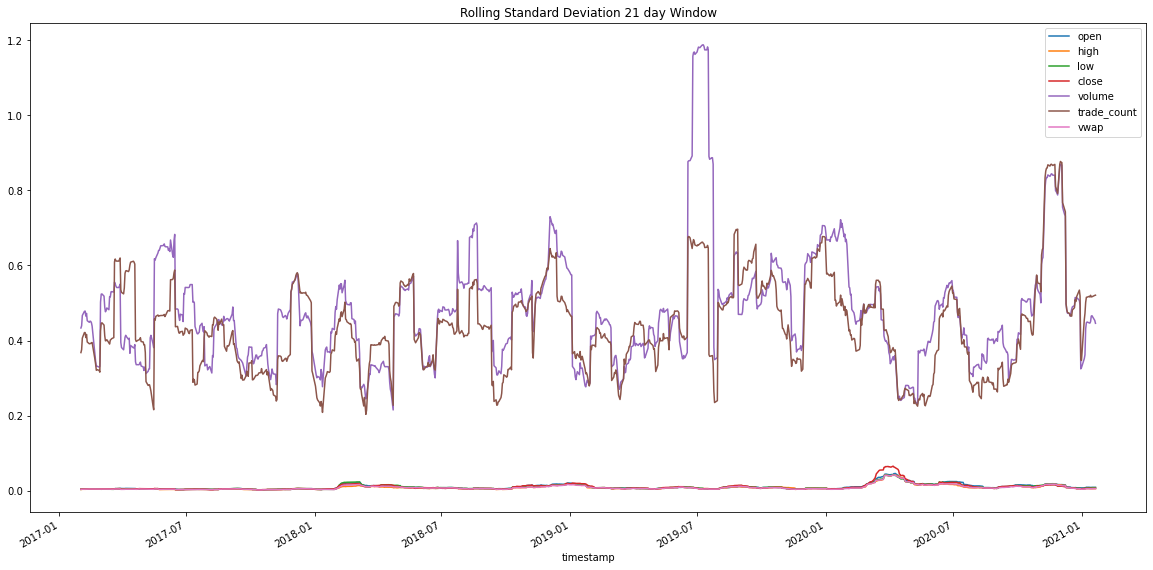

In [67]:
# Calculate the annualized standard deviation
dow_cumulative_returns_biden.rolling(window=252).std()

# Calculate and plot rolling standard deviation 
dow_cumulative_returns_biden.rolling(window=21).std()

# Plot the rolling standard deviation 
dow_cumulative_returns_biden.rolling(window=21).std().plot(figsize=(20,10),title="Rolling Standard Deviation 21 day Window")

# Save plot as JPEG
plt.savefig("dow_cumulative_returns_biden_standard_deviation.jpg")

### Joe Biden: DIA Tickers

In [68]:
# DOW JONES: Donald Trump
symbols = ["AXP", "AMGN", "APPL", "BA", "CAT", "CSCO", "CVX", "GS", "HD", "HON", "IBM", "INTC", "JNJ", "KO", "JPM", "MCD", "MMM", "MRK", "MSFT", "NKE", "PG", "TRV", "UNH", "CRM", "VZ", "V", "WMT", "DIS", "DOW"]
timeframe = "1Day"
start = "2021-01-20"
end = "2022-04-13"

# Retrieve daily bars 
tickers_trump = alpaca.get_bars(symbols, timeframe, start, end).df
print(tickers_trump.head())

                             open    high     low   close   volume  \
timestamp                                                            
2021-01-20 05:00:00+00:00  248.33  253.35  246.12  252.36  2768545   
2021-01-21 05:00:00+00:00  252.34  252.73  249.52  252.03  2216075   
2021-01-22 05:00:00+00:00  252.26  255.23  250.56  253.50  1866683   
2021-01-25 05:00:00+00:00  252.05  257.11  251.85  257.10  1830702   
2021-01-26 05:00:00+00:00  256.59  259.07  254.86  258.60  2009070   

                           trade_count        vwap symbol  
timestamp                                                  
2021-01-20 05:00:00+00:00        38876  251.616327   AMGN  
2021-01-21 05:00:00+00:00        31244  251.572302   AMGN  
2021-01-22 05:00:00+00:00        31477  253.860641   AMGN  
2021-01-25 05:00:00+00:00        33660  255.578042   AMGN  
2021-01-26 05:00:00+00:00        32043  257.439530   AMGN  


# Linear Regression
SKLearn linear regression model to predict the cumulative returns of the Dow Jones index with lagged returns.

In [69]:
# Inspect relevant dataframe
dow_bars_biden.head()

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2017-01-03 05:00:00+00:00,198.70,199.100,197.480,198.42,6669759,34518,198.138509
2017-01-04 05:00:00+00:00,198.76,199.360,198.600,199.15,4823184,31387,199.075727
2017-01-05 05:00:00+00:00,198.95,199.265,197.895,198.75,4124542,25108,198.723084
2017-01-06 05:00:00+00:00,198.73,199.830,198.170,199.51,4322585,26783,199.321908
2017-01-09 05:00:00+00:00,199.09,199.270,198.750,198.76,2303543,15160,198.934408


In [70]:
# TRUMP: Cumulative/Daily Returns
dow_bars_biden["return"] = (dow_bars_biden[["open"]].pct_change()*100)
dow_bars_biden.head()

,open,high,low,close,volume,trade_count,vwap,return
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,198.70,199.100,197.480,198.42,6669759,34518,198.138509,NaN
2017-01-04 05:00:00+00:00,198.76,199.360,198.600,199.15,4823184,31387,199.075727,0.030196
2017-01-05 05:00:00+00:00,198.95,199.265,197.895,198.75,4124542,25108,198.723084,0.095593
2017-01-06 05:00:00+00:00,198.73,199.830,198.170,199.51,4322585,26783,199.321908,-0.110581
2017-01-09 05:00:00+00:00,199.09,199.270,198.750,198.76,2303543,15160,198.934408,0.181150


In [71]:
# Remove null values
dow_bars_biden = dow_bars_biden.replace(-np.inf, np.nan).dropna()
dow_bars_biden.tail()

,open,high,low,close,volume,trade_count,vwap,return
timestamp,,,,,,,,
2021-01-13 05:00:00+00:00,310.63,311.6000,309.92,310.63,1854424,18927,310.854722,0.132164
2021-01-14 05:00:00+00:00,311.57,312.2683,309.89,310.05,3232381,24226,311.062919,0.302611
2021-01-15 05:00:00+00:00,308.01,309.3200,306.03,308.12,4009256,33214,308.129519,-1.142600
2021-01-19 05:00:00+00:00,310.34,310.7400,308.60,309.32,2781746,21959,309.630834,0.756469
2021-01-20 05:00:00+00:00,310.40,312.3385,309.94,311.77,2398402,21699,311.241031,0.019334


In [72]:
# CSV
file_path = ("DIA_cumulative_returns_biden.csv")
dow_bars_biden.to_csv(file_path, index=False, encoding='utf-8-sig') 

In [73]:
# Create a lagged return using the shift function
dow_bars_biden['lagged_return'] = dow_bars_biden["return"].shift()
dow_bars_biden.tail()

,open,high,low,close,volume,trade_count,vwap,return,lagged_return
timestamp,,,,,,,,,
2021-01-13 05:00:00+00:00,310.63,311.6000,309.92,310.63,1854424,18927,310.854722,0.132164,0.554277
2021-01-14 05:00:00+00:00,311.57,312.2683,309.89,310.05,3232381,24226,311.062919,0.302611,0.132164
2021-01-15 05:00:00+00:00,308.01,309.3200,306.03,308.12,4009256,33214,308.129519,-1.142600,0.302611
2021-01-19 05:00:00+00:00,310.34,310.7400,308.60,309.32,2781746,21959,309.630834,0.756469,-1.142600
2021-01-20 05:00:00+00:00,310.40,312.3385,309.94,311.77,2398402,21699,311.241031,0.019334,0.756469


<AxesSubplot:xlabel='timestamp'>

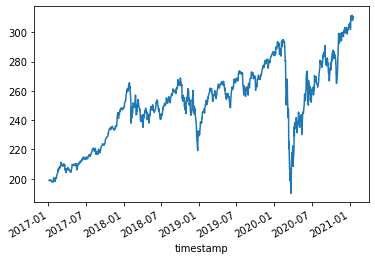

In [74]:
# Plot DIA price
dow_bars_biden['open'].plot()

<AxesSubplot:xlabel='timestamp'>

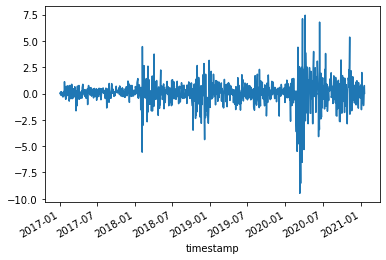

In [75]:
# Plot cumulative returns
dow_bars_biden['return'].plot()

### Train Test Split

In [90]:
dow_bars_biden.head()

,open,high,low,close,volume,trade_count,vwap,return,lagged_return
timestamp,,,,,,,,,
2017-01-05 05:00:00+00:00,198.95,199.265,197.895,198.75,4124542,25108,198.723084,0.095593,0.030196
2017-01-06 05:00:00+00:00,198.73,199.830,198.170,199.51,4322585,26783,199.321908,-0.110581,0.095593
2017-01-09 05:00:00+00:00,199.09,199.270,198.750,198.76,2303543,15160,198.934408,0.181150,-0.110581
2017-01-10 05:00:00+00:00,198.72,199.405,198.210,198.40,3029218,17926,198.720615,-0.185846,0.181150
2017-01-11 05:00:00+00:00,198.63,199.570,198.150,199.33,5209773,30015,198.883104,-0.045290,-0.185846


In [104]:
# Create a train/test split for the data using 2021 for testing and the rest for training
train = dow_bars_biden['2021']
test = dow_bars_biden['2022':]

In [105]:
# Create four dataframes:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
x_train = train["lagged_return"].to_frame()
y_train = train["return"]
x_test = test["lagged_return"].to_frame()
y_test = test["return"]

In [107]:
# Create our features
X = pd.get_dummies(dow_bars_biden.drop('open', axis = 1))

# Create our target
y = dow_bars_biden['return']

In [108]:
# Inspect dataframe
dow_bars_biden.head()

,open,high,low,close,volume,trade_count,vwap,return,lagged_return
timestamp,,,,,,,,,
2017-01-05 05:00:00+00:00,198.95,199.265,197.895,198.75,4124542,25108,198.723084,0.095593,0.030196
2017-01-06 05:00:00+00:00,198.73,199.830,198.170,199.51,4322585,26783,199.321908,-0.110581,0.095593
2017-01-09 05:00:00+00:00,199.09,199.270,198.750,198.76,2303543,15160,198.934408,0.181150,-0.110581
2017-01-10 05:00:00+00:00,198.72,199.405,198.210,198.40,3029218,17926,198.720615,-0.185846,0.181150
2017-01-11 05:00:00+00:00,198.63,199.570,198.150,199.33,5209773,30015,198.883104,-0.045290,-0.185846


In [110]:
# JPEG 


In [111]:
# Remove null values
dow_bars_biden = dow_bars_biden.replace(-np.inf, np.nan).dropna()
dow_bars_biden.tail()

,open,high,low,close,volume,trade_count,vwap,return,lagged_return
timestamp,,,,,,,,,
2021-01-13 05:00:00+00:00,310.63,311.6000,309.92,310.63,1854424,18927,310.854722,0.132164,0.554277
2021-01-14 05:00:00+00:00,311.57,312.2683,309.89,310.05,3232381,24226,311.062919,0.302611,0.132164
2021-01-15 05:00:00+00:00,308.01,309.3200,306.03,308.12,4009256,33214,308.129519,-1.142600,0.302611
2021-01-19 05:00:00+00:00,310.34,310.7400,308.60,309.32,2781746,21959,309.630834,0.756469,-1.142600
2021-01-20 05:00:00+00:00,310.40,312.3385,309.94,311.77,2398402,21699,311.241031,0.019334,0.756469


In [116]:
# Create a Linear Regression model and fit it to the training data
model = LinearRegression()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [36]:
# Construct a dataframe using just the "y" training data:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(x_test)

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

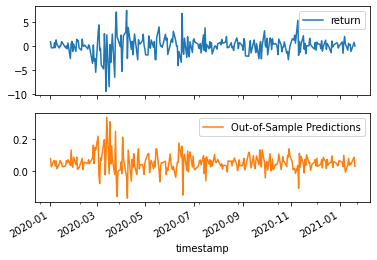

In [37]:
# Plot the out-of-sample results
out_of_sample_results.plot(subplots=True)

In [ ]:
# JPEG 


In [38]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(
    out_of_sample_results["return"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 1.9420739505871765


In [40]:
# Rolling out-of-sample predictions 
# Split the index into weekly periods
weeks = dow_bars_biden.index.to_period("w").unique()
print(weeks[0])

2017-01-02/2017-01-08


C:\Users\CharbelNehme\anaconda3\envs\dev\lib\site-packages\pandas\core\arrays\datetimes.py:1146: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [41]:
# Define the timeframe of rolling windows
training_window = 12
timeframe = len(weeks) - training_window - 1
print(timeframe)

199


In [42]:
# Construct empty placeholder dataframes.
# (During each iteration of the loop, we'll append that week"s predictions to this DataFrame)
all_predictions = pd.DataFrame(columns=["Out-of-Sample Predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

In [45]:
# During rolling iteration, split into train and test sets.
# Use linear regression to make out-of-sample predictions.
# Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Beginning of training window
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training window
    end_of_training_period = weeks[training_window+i].end_time.strftime(format="%Y-%m-%d")

    # Window of test-window data
    test_week = weeks[training_window + i + 1]
    
    # String of testing window
    start_of_test_week  = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_week = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = dow_bars_trump.loc[start_of_training_period:end_of_training_period]
    test = dow_bars_trump.loc[start_of_test_week:end_of_test_week]
    
    # Create new dataframes:
    #x_train = train["lagged_return"].to_frame()
    #y_train = train["return"]
    #X_test = test["lagged_return"].to_frame()
   # y_test = test["return"]

    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    
    # Create a temporary dataframe to hold predictions
    predictions = pd.DataFrame(predictions, index=x_test.index, columns=["Out-of-Sample Predictions"])
    
    # Create a temporary DataFrame of the actual "y"s in the test dataframe, with column name="Actual Returns": 
    actuals = pd.DataFrame(y_test, index=y_test.index)
    actuals.columns = ["Actual Returns"]  
    
    # Append these two dataframes (predictions and actuals) to the two master DataFrames built outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)   

In [46]:
# Concat actual returns with out-of-sample predictions
results = pd.concat([all_actuals, all_predictions], axis=1)
results.head()

,Actual Returns,Out-of-Sample Predictions
2020-01-02 05:00:00+00:00,0.891127,0.078157
2020-01-03 05:00:00+00:00,-0.370060,0.025612
2020-01-06 05:00:00+00:00,-0.381947,0.063703
2020-01-07 05:00:00+00:00,0.707025,0.064062
2020-01-08 05:00:00+00:00,-0.342298,0.031172


In [89]:
# Plot the results


In [55]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
mse = mean_squared_error(
    results_2019["Actual Returns"],
    results_2019["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(mse)
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Rolling Out-of-Sample Root Mean Squared Error (RMSE): 1.9420739505871765


In [56]:
# Print out-of-sample RMSE and rolling out-of-sample RMSE
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 1.9420739505871765
Rolling Out-of-Sample Root Mean Squared Error (RMSE): 1.9420739505871765
